Pipelines and composite estimators

 Build a pipeline

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [20]:
estimators = [('reduce_dim', PCA()), ('clf', SVC())]
pipe = Pipeline(estimators)

In [21]:
pipe

Pipeline(steps=[('reduce_dim', PCA()), ('clf', SVC())])

In [22]:
pipe[:1]

Pipeline(steps=[('reduce_dim', PCA())])

In [23]:
pipe[-1:]

Pipeline(steps=[('clf', SVC())])

In [24]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
iris = load_iris()
pipe = Pipeline(steps=[
   ('select', SelectKBest(k=2)),
   ('clf', LogisticRegression())])

In [25]:
pipe.fit(iris.data, iris.target)

Pipeline(steps=[('select', SelectKBest(k=2)), ('clf', LogisticRegression())])

In [26]:
pipe[:-1].get_feature_names_out()

array(['x2', 'x3'], dtype=object)

In [27]:
pipe = Pipeline(steps=[("reduce_dim", PCA()), ("clf", SVC())])
pipe.set_params(clf__C=10) # set the parameters  to clf clf__c

Pipeline(steps=[('reduce_dim', PCA()), ('clf', SVC(C=10))])

Caching transformers: avoid repeated computation
Fitting transformers may be computationally expensive. With its memory parameter set, Pipeline will cache each transformer after calling fit. This feature is used to avoid computing the fit transformers within a pipeline if the parameters and input data are identical. A typical example is the case of a grid search in which the transformers can be fitted only once and reused for each configuration. The last step will never be cached, even if it is a transformer.

In [28]:
from tempfile import mkdtemp
from shutil import rmtree
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
estimators = [('reduce_dim', PCA()), ('clf', SVC())]
cachedir = mkdtemp()
pipe = Pipeline(estimators, memory=cachedir)
pipe

Pipeline(memory='C:\\Users\\lenovo\\AppData\\Local\\Temp\\tmpals4btur',
         steps=[('reduce_dim', PCA()), ('clf', SVC())])

In [29]:
# Clear the cache directory when you don't need it anymore
rmtree(cachedir)

In [30]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Transforming target in regression

In [31]:

X, y = fetch_california_housing(return_X_y=True)
X, y = X[:2000, :], y[:2000]  # select a subset of data
transformer = QuantileTransformer(output_distribution='normal')
regressor = LinearRegression()
regr = TransformedTargetRegressor(regressor=regressor,
                                  transformer=transformer)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
regr.fit(X_train, y_train)

TransformedTargetRegressor(regressor=LinearRegression(),
                           transformer=QuantileTransformer(output_distribution='normal'))

In [32]:
print('R2 score: {0:.2f}'.format(regr.score(X_test, y_test)))

R2 score: 0.61


In [33]:
raw_target_regr = LinearRegression().fit(X_train, y_train)
print('R2 score: {0:.2f}'.format(raw_target_regr.score(X_test, y_test)))

R2 score: 0.59


In [34]:
def func(x):
    return np.log(x)
def inverse_func(x):
    return np.exp(x)

In [35]:
regr = TransformedTargetRegressor(regressor=regressor,
                                  func=func,
                                  inverse_func=inverse_func)
regr.fit(X_train, y_train)
print('R2 score: {0:.2f}'.format(regr.score(X_test, y_test)))

R2 score: 0.51


In [36]:
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
estimators = [('linear_pca', PCA()), ('kernel_pca', KernelPCA())]
combined = FeatureUnion(estimators)
combined

FeatureUnion(transformer_list=[('linear_pca', PCA()),
                               ('kernel_pca', KernelPCA())])

In [37]:
combined.set_params(kernel_pca='drop')

FeatureUnion(transformer_list=[('linear_pca', PCA()), ('kernel_pca', 'drop')])

ColumnTransformer for heterogeneous data

In [38]:
import pandas as pd
X = pd.DataFrame(
    {'city': ['London', 'London', 'Paris', 'Sallisaw'],
     'title': ["His Last Bow", "How Watson Learned the Trick",
               "A Moveable Feast", "The Grapes of Wrath"],
     'expert_rating': [5, 3, 4, 5],
     'user_rating': [4, 5, 4, 3]})

In [39]:
X

,city,title,expert_rating,user_rating
0,London,His Last Bow,5,4
1,London,How Watson Learned the Trick,3,5
2,Paris,A Moveable Feast,4,4
3,Sallisaw,The Grapes of Wrath,5,3


In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder

In [41]:
column_trans = ColumnTransformer(
    [('categories', OneHotEncoder(dtype='int'), ['city']),
     ('title_bow', CountVectorizer(), 'title')], # word to vectorizer
    remainder='drop', verbose_feature_names_out=False)  # transform 1st two city and title columns rest are dropped

In [42]:
column_trans.fit(X)

ColumnTransformer(transformers=[('categories', OneHotEncoder(dtype='int'),
                                 ['city']),
                                ('title_bow', CountVectorizer(), 'title')],
                  verbose_feature_names_out=False)

In [43]:
column_trans.get_feature_names_out()

array(['city_London', 'city_Paris', 'city_Sallisaw', 'bow', 'feast',
       'grapes', 'his', 'how', 'last', 'learned', 'moveable', 'of', 'the',
       'trick', 'watson', 'wrath'], dtype=object)

In [ ]:
column_trans.transform(X) # vocabulary size 16

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 18 stored elements and shape (4, 16)>

In [45]:
column_trans.transform(X).toarray() # word to vect for city and title column

array([[1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1]])

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
ct = ColumnTransformer([
      ('scale', StandardScaler(),make_column_selector(dtype_include=np.number)), # for numeric columns
      ('onehot',OneHotEncoder(),make_column_selector(pattern='city', dtype_include=object))]) # for categorical columns
ct.fit_transform(X)

array([[ 0.90453403,  0.        ,  1.        ,  0.        ,  0.        ],
       [-1.50755672,  1.41421356,  1.        ,  0.        ,  0.        ],
       [-0.30151134,  0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.90453403, -1.41421356,  0.        ,  0.        ,  1.        ]])

In [47]:
column_trans = ColumnTransformer(
    [('city_category', OneHotEncoder(dtype='int'),['city']),
     ('title_bow', CountVectorizer(), 'title')],
    remainder='passthrough') # for 1st two( city and title) columns rest are unchanged

column_trans.fit_transform(X)

array([[1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 5, 4],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 3, 5],
       [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 4, 4],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 5, 3]])

In [48]:
from sklearn.preprocessing import MinMaxScaler
column_trans = ColumnTransformer(
    [('city_category', OneHotEncoder(), ['city']),
     ('title_bow', CountVectorizer(), 'title')],
    remainder=MinMaxScaler()) # for city and title rest ccolumn are applied to minmax scaler


In [49]:
column_trans.fit_transform(X)

array([[1. , 0. , 0. , 1. , 0. , 0. , 1. , 0. , 1. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 1. , 0.5],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 1. , 0. , 0. , 1. ,
        1. , 1. , 0. , 0. , 1. ],
       [0. , 1. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. ,
        0. , 0. , 0. , 0.5, 0.5],
       [0. , 0. , 1. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 1. , 1. ,
        0. , 0. , 1. , 1. , 0. ]])

In [50]:
column_trans.fit_transform(X)[:, -2:]

array([[1. , 0.5],
       [0. , 1. ],
       [0.5, 0.5],
       [1. , 0. ]])

In [51]:
from sklearn.compose import make_column_transformer
column_trans = make_column_transformer(
    (OneHotEncoder(), ['city']),
    (CountVectorizer(), 'title'),
    remainder=MinMaxScaler())
column_trans

ColumnTransformer(remainder=MinMaxScaler(),
                  transformers=[('onehotencoder', OneHotEncoder(), ['city']),
                                ('countvectorizer', CountVectorizer(),
                                 'title')])

In [ ]:
ct = ColumnTransformer(
         [("scale", StandardScaler(), ["expert_rating"])]) # for expert rating columns

In [54]:
ct.fit(X)

ColumnTransformer(transformers=[('scale', StandardScaler(), ['expert_rating'])])

In [55]:
X_new = pd.DataFrame({"expert_rating": [5, 6, 1],
                      "ignored_new_col": [1.2, 0.3, -0.1]})

In [56]:
ct.transform(X_new)

array([[ 0.90453403],
       [ 2.11057941],
       [-3.91964748]])

In [58]:
from sklearn import set_config
set_config(display='text')  
# displays text representation in a jupyter context
column_trans 

ColumnTransformer(remainder=MinMaxScaler(),
                  transformers=[('onehotencoder', OneHotEncoder(), ['city']),
                                ('countvectorizer', CountVectorizer(),
                                 'title')])

In [ ]:
from sklearn.utils import estimator_html_repr
with open('my_estimator.html', 'w') as f:  
    f.write(estimator_html_repr(clf))

Feature extraction

In [ ]:
measurements = [
    {'city': 'Dubai', 'temperature': 33.},
    {'city': 'London', 'temperature': 12.},
    {'city': 'San Francisco', 'temperature': 18.},
] # list

In [62]:
pd.DataFrame(measurements)

,city,temperature
0,Dubai,33.0
1,London,12.0
2,San Francisco,18.0


In [60]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()

In [ ]:
vec.fit_transform(measurements).toarray()  # onehot encoding

array([[ 1.,  0.,  0., 33.],
       [ 0.,  1.,  0., 12.],
       [ 0.,  0.,  1., 18.]])

In [ ]:
vec.get_feature_names_out()

array(['city=Dubai', 'city=London', 'city=San Francisco', 'temperature'],
      dtype=object)

In [ ]:
movie_entry = [{'category': ['thriller', 'drama'], 'year': 2003},
               {'category': ['animation', 'family'], 'year': 2011},
               {'year': 1974}] # list

In [69]:
dict = {'category': ['thriller', 'drama'], 'year': 2003}

In [70]:
pd.DataFrame(dict)

,category,year
0,thriller,2003
1,drama,2003


In [68]:
pd.DataFrame(movie_entry)

,category,year
0,"[thriller, drama]",2003
1,"[animation, family]",2011
2,NaN,1974


In [66]:
vec.fit_transform(movie_entry).toarray()

array([[0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 2.003e+03],
       [1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 2.011e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.974e+03]])

In [67]:
vec.get_feature_names_out()

array(['category=animation', 'category=drama', 'category=family',
       'category=thriller', 'year'], dtype=object)

In [71]:
vec.transform({'category': ['thriller'],
               'unseen_feature': '3'}).toarray()

array([[0., 0., 0., 1., 0.]])

In [72]:
{'category': ['thriller'],
               'unseen_feature': '3'}

{'category': ['thriller'], 'unseen_feature': '3'}

In [73]:
pos_window = [
    {
        'word-2': 'the',
        'pos-2': 'DT',
        'word-1': 'cat',
        'pos-1': 'NN',
        'word+1': 'on',
        'pos+1': 'PP',
    },
    # in a real application one would extract many such dictionaries
]

In [ ]:
vec = DictVectorizer()
pos_vectorized = vec.fit_transform(pos_window) # vocabulary size 6
pos_vectorized

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6 stored elements and shape (1, 6)>

In [75]:
pos_vectorized.toarray()


array([[1., 1., 1., 1., 1., 1.]])

In [76]:
vec.get_feature_names_out()

array(['pos+1=PP', 'pos-1=NN', 'pos-2=DT', 'word+1=on', 'word-1=cat',
       'word-2=the'], dtype=object)

Feature hashing

In [77]:
def token_features(token, part_of_speech):
    if token.isdigit():
        yield "numeric"
    else:
        yield "token={}".format(token.lower())
        yield "token,pos={},{}".format(token, part_of_speech)
    if token[0].isupper():
        yield "uppercase_initial"
    if token.isupper():
        yield "all_uppercase"
    yield "pos={}".format(part_of_speech)

In [ ]:
raw_X = (token_features(tok, pos_tagger(tok)) for tok in corpus)

In [ ]:
hasher = FeatureHasher(input_type='string')
X = hasher.transform(raw_X)

Text feature extraction

The Bag of Words representation

tokenizing strings and giving an integer id for each possible token, for instance by using white-spaces and punctuation as token separators.

counting the occurrences of tokens in each document.

normalizing and weighting with diminishing importance tokens that occur in the majority of samples / documents.

each individual token occurrence frequency (normalized or not) is treated as a feature.

the vector of all the token frequencies for a given document is considered a multivariate sample.

We call vectorization the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the Bag of Words or “Bag of n-grams” representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

Sparsity

As most documents will typically use a very small subset of the words used in the corpus, the resulting matrix will have many feature values that are zeros (typically more than 99% of them).

For instance a collection of 10,000 short text documents (such as emails) will use a vocabulary with a size in the order of 100,000 unique words in total while each document will use 100 to 1000 unique words individually.

In order to be able to store such a matrix in memory but also to speed up algebraic operations matrix / vector, implementations will typically use a sparse representation such as the implementations available in the scipy.sparse package.

In [78]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer() # bag of words  1 gram

In [ ]:
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
]
X = vectorizer.fit_transform(corpus) #vocabulary size 9 
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 19 stored elements and shape (4, 9)>

In [81]:
X.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

In [82]:
analyze = vectorizer.build_analyzer()
analyze("This is a text document to analyze.") == (
    ['this', 'is', 'text', 'document', 'to', 'analyze'])

True

In [84]:
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

In [ ]:
X.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

In [85]:
vectorizer.vocabulary_.get('document')

1

In [ ]:
vectorizer.transform(['Something completely new.']).toarray() # out of vocabularies or corpus

array([[0, 0, 0, 0, 0, 0, 0, 0, 0]])

Note that in the previous corpus, the first and the last documents have exactly the same words hence are encoded in equal vectors. In particular we lose the information that the last document is an interrogative form. To preserve some of the local ordering information we can extract 2-grams of words in addition to the 1-grams (individual words):

In [88]:
bigram_vectorizer = CountVectorizer(ngram_range=(1, 2),
                                    token_pattern=r'\b\w+\b', min_df=1)
analyze = bigram_vectorizer.build_analyzer()
analyze('Bi-grams are cool!') == (
    ['bi', 'grams', 'are', 'cool', 'bi grams', 'grams are', 'are cool'])


True

In [89]:
X_2 = bigram_vectorizer.fit_transform(corpus).toarray()

In [90]:
X_2

array([[0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1]])

In [92]:
feature_index = bigram_vectorizer.vocabulary_.get('is this')


In [93]:
feature_index

7

In [94]:
X_2[:, feature_index]

array([0, 0, 0, 1])

Using stop words

Stop words are words like “and”, “the”, “him”, which are presumed to be uninformative in representing the content of a text, and which may be removed to avoid them being construed as signal for prediction. Sometimes, however, similar words are useful for prediction, such as in classifying writing style or personality.

Tf–idf term weighting

In a large text corpus, some words will be very present (e.g. “the”, “a”, “is” in English) hence carrying very little meaningful information about the actual contents of the document. If we were to feed the direct count data directly to a classifier those very frequent terms would shadow the frequencies of rarer yet more interesting terms.

In a large text corpus, some words will be very present (e.g. “the”, “a”, “is” in English) hence carrying very little meaningful information about the actual contents of the document. If we were to feed the direct count data directly to a classifier those very frequent terms would shadow the frequencies of rarer yet more interesting terms.

In order to re-weight the count features into floating point values suitable for usage by a classifier it is very common to use the tf–idf transform.

Tf means term-frequency while tf–idf means term-frequency times inverse document-frequency: <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mtext>tf-idf(t,d)</mtext>
  <mo>=</mo>
  <mtext>tf(t,d)</mtext>
  <mo>&#xD7;</mo>
  <mtext>idf(t)</mtext>
</math>
.

Using the TfidfTransformer’s default settings, TfidfTransformer(norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False) the term frequency, the number of times a term occurs in a given document, is multiplied with idf component, which is computed as

 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mtext>idf</mtext>
  <mo stretchy="false">(</mo>
  <mi>t</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mi>log</mi>
  <mo data-mjx-texclass="NONE">&#x2061;</mo>
  <mrow data-mjx-texclass="ORD">
    <mfrac>
      <mrow>
        <mn>1</mn>
        <mo>+</mo>
        <mi>n</mi>
      </mrow>
      <mrow>
        <mn>1</mn>
        <mo>+</mo>
        <mtext>df</mtext>
        <mo stretchy="false">(</mo>
        <mi>t</mi>
        <mo stretchy="false">)</mo>
      </mrow>
    </mfrac>
  </mrow>
  <mo>+</mo>
  <mn>1</mn>
</math>
,

where N
 is the total number of documents in the document set, and df(t)
 is the number of documents in the document set that contain term t
. The resulting tf-idf vectors are then normalized by the Euclidean norm:

 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mtext>idf</mtext>
  <mo stretchy="false">(</mo>
  <mi>t</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mi>log</mi>
  <mo data-mjx-texclass="NONE">&#x2061;</mo>
  <mrow data-mjx-texclass="ORD">
    <mfrac>
      <mrow>
        <mn>1</mn>
        <mo>+</mo>
        <mi>n</mi>
      </mrow>
      <mrow>
        <mn>1</mn>
        <mo>+</mo>
        <mtext>df</mtext>
        <mo stretchy="false">(</mo>
        <mi>t</mi>
        <mo stretchy="false">)</mo>
      </mrow>
    </mfrac>
  </mrow>
  <mo>+</mo>
  <mn>1</mn>
</math>
 
.

This was originally a term weighting scheme developed for information retrieval (as a ranking function for search engines results) that has also found good use in document classification and clustering.

The following sections contain further explanations and examples that illustrate how the tf-idfs are computed exactly and how the tf-idfs computed in scikit-learn’s TfidfTransformer and TfidfVectorizer differ slightly from the standard textbook notation that defines the idf as
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mtext>idf</mtext>
  <mo stretchy="false">(</mo>
  <mi>t</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mi>log</mi>
  <mo data-mjx-texclass="NONE">&#x2061;</mo>
  <mrow data-mjx-texclass="ORD">
    <mfrac>
      <mi>n</mi>
      <mrow>
        <mn>1</mn>
        <mo>+</mo>
        <mtext>df</mtext>
        <mo stretchy="false">(</mo>
        <mi>t</mi>
        <mo stretchy="false">)</mo>
      </mrow>
    </mfrac>
  </mrow>
  <mo>.</mo>
</math>

 

In the TfidfTransformer and TfidfVectorizer with smooth_idf=False, the “1” count is added to the idf instead of the idf’s denominator:

<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mtext>idf</mtext>
  <mo stretchy="false">(</mo>
  <mi>t</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mi>log</mi>
  <mo data-mjx-texclass="NONE">&#x2061;</mo>
  <mrow data-mjx-texclass="ORD">
    <mfrac>
      <mi>n</mi>
      <mrow>
        <mtext>df</mtext>
        <mo stretchy="false">(</mo>
        <mi>t</mi>
        <mo stretchy="false">)</mo>
      </mrow>
    </mfrac>
  </mrow>
  <mo>+</mo>
  <mn>1</mn>
</math>


In [95]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
transformer

TfidfTransformer(smooth_idf=False)

Decoding text files

Text is made of characters, but files are made of bytes. These bytes represent characters according to some encoding. To work with text files in Python, their bytes must be decoded to a character set called Unicode. Common encodings are ASCII, Latin-1 (Western Europe), KOI8-R (Russian) and the universal encodings UTF-8 and UTF-16. Many others exist.

Limitations of the Bag of Words representation

In [ ]:
ngram_vectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(2, 2)) # analyzer = char_wb
counts = ngram_vectorizer.fit_transform(['words', 'wprds'])
ngram_vectorizer.get_feature_names_out()
counts.toarray().astype(int)

array([[1, 1, 1, 0, 1, 1, 1, 0],
       [1, 1, 0, 1, 1, 1, 0, 1]])

In [97]:
ngram_vectorizer.get_feature_names_out()

array([' w', 'ds', 'or', 'pr', 'rd', 's ', 'wo', 'wp'], dtype=object)

In [98]:
ngram_vectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(5, 5))
ngram_vectorizer.fit_transform(['jumpy fox'])

ngram_vectorizer.get_feature_names_out()



array([' fox ', ' jump', 'jumpy', 'umpy '], dtype=object)

In [99]:
ngram_vectorizer = CountVectorizer(analyzer='char', ngram_range=(5, 5))
ngram_vectorizer.fit_transform(['jumpy fox'])
ngram_vectorizer.get_feature_names_out()

array(['jumpy', 'mpy f', 'py fo', 'umpy ', 'y fox'], dtype=object)

In [100]:
def my_tokenizer(s):
    return s.split()
vectorizer = CountVectorizer(tokenizer=my_tokenizer)
vectorizer.build_analyzer()(u"Some... punctuation!") == (
    ['some...', 'punctuation!'])

True

Image feature extraction

In [101]:
import numpy as np
from sklearn.feature_extraction import image

In [ ]:
one_image = np.arange(4 * 4 * 3).reshape((4, 4, 3)) #  row ,column ,chanel

In [103]:
one_image

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23]],

       [[24, 25, 26],
        [27, 28, 29],
        [30, 31, 32],
        [33, 34, 35]],

       [[36, 37, 38],
        [39, 40, 41],
        [42, 43, 44],
        [45, 46, 47]]])

In [108]:
np.array([['r000','g001','b002'],
           ['r010','g011','b013'],
           ])

array([['r000', 'g001', 'b002'],
       ['r010', 'g011', 'b013']], dtype='<U4')

In [ ]:
np.array([['r000','g001','b002'],
           ['r010','g011','b013'],
           ])[:, np.newaxis] # add column dimension

array([[['r000', 'g001', 'b002']],

       [['r010', 'g011', 'b013']]], dtype='<U4')

In [ ]:
np.array([['r000','g001','b002'],
           ['r010','g011','b013'],
           ])[np.newaxis,:] # add row dimension

array([[['r000', 'g001', 'b002'],
        ['r010', 'g011', 'b013']]], dtype='<U4')

In [104]:
one_image[:, :, 0]  # R channel of a fake RGB picture

array([[ 0,  3,  6,  9],
       [12, 15, 18, 21],
       [24, 27, 30, 33],
       [36, 39, 42, 45]])

In [117]:

patches = image.extract_patches_2d(one_image, (2, 2), max_patches=2,
    random_state=0)


In [118]:
patches



array([[[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[12, 13, 14],
         [15, 16, 17]]],


       [[[15, 16, 17],
         [18, 19, 20]],

        [[27, 28, 29],
         [30, 31, 32]]]])

In [119]:
patches.shape

(2, 2, 2, 3)

In [120]:
from sklearn import preprocessing
import numpy as np
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

In [121]:
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler()

In [122]:
scaler.mean_

array([1.        , 0.        , 0.33333333])

In [123]:
scaler.scale_

array([0.81649658, 0.81649658, 1.24721913])

In [124]:
X_scaled = scaler.transform(X_train)
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [126]:
X_scaled.mean(axis=0)

array([0., 0., 0.])

In [127]:
X_scaled.std(axis=0)

array([1., 1., 1.])

In [128]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [129]:
X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [130]:
pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

0.96

In [131]:
from sklearn import preprocessing
import numpy as np
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler()

In [ ]:
scaler.mean_

array([1.        , 0.        , 0.33333333])

In [ ]:
scaler.scale_

array([0.81649658, 0.81649658, 1.24721913])

In [134]:
X_scaled = scaler.transform(X_train)
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [135]:
X_scaled.mean(axis=0)

array([0., 0., 0.])

In [136]:

X_scaled.std(axis=0)

array([1., 1., 1.])

In [137]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [138]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [139]:
min_max_scaler.scale_


array([0.5       , 0.5       , 0.33333333])

In [140]:

min_max_scaler.min_

array([0.        , 0.5       , 0.33333333])

In [142]:
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))



In [ ]:
X_scaled = X_std * (max - min) + min

MaxAbsScaler works in a very similar fashion, but scales in a way that the training data lies within the range [-1, 1] by dividing through the largest maximum value in each feature. It is meant for data that is already centered at zero or sparse data.

In [143]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_maxabs = max_abs_scaler.fit_transform(X_train)
X_train_maxabs

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

In [144]:
X_test = np.array([[ -3., -1.,  4.]])
X_test_maxabs = max_abs_scaler.transform(X_test)
X_test_maxabs

array([[-1.5, -1. ,  2. ]])

In [146]:
max_abs_scaler.scale_

array([2., 1., 2.])

Mapping to a Uniform distribution

In [147]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [ ]:
quantile_transformer = preprocessing.QuantileTransformer(random_state=0)
X_train_trans = quantile_transformer.fit_transform(X_train)
X_test_trans = quantile_transformer.transform(X_test)


d:\a27_YEARS_OLD\ml_tools\venv\Lib\site-packages\sklearn\preprocessing\_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (112). n_quantiles is set to n_samples.
  warnings.warn(


array([4.3, 5.1, 5.8, 6.5, 7.9])

QuantileTransformer provides a non-parametric transformation to map the data to a uniform distribution with values between 0 and 1:

In [153]:
X_test_trans[:5]

array([[0.50900901, 0.26576577, 0.71621622, 0.97747748],
       [0.57657658, 0.01351351, 0.42342342, 0.35585586],
       [0.36036036, 0.99399399, 0.10810811, 0.13513514],
       [0.94144144, 0.31531532, 0.96096096, 0.7027027 ],
       [0.17567568, 0.81081081, 0.1981982 , 0.13513514]])

In [151]:
X_train_trans[:5]

array([[0.54954955, 0.43693694, 0.48198198, 0.59009009],
       [0.50900901, 0.16216216, 0.42342342, 0.41441441],
       [0.85135135, 0.43693694, 0.80630631, 0.85135135],
       [0.06756757, 0.66666667, 0.04504505, 0.13513514],
       [0.87837838, 0.57657658, 0.71621622, 0.93243243]])

In [152]:
np.percentile(X_train[:, 0], [0, 25, 50, 75, 100]) 

array([4.3, 5.1, 5.8, 6.5, 7.9])

In [154]:
np.percentile(X_train_trans[:, 0], [0, 25, 50, 75, 100])

array([0.        , 0.23873874, 0.50900901, 0.74324324, 1.        ])

In [155]:
np.percentile(X_test[:, 0], [0, 25, 50, 75, 100])

array([4.4  , 5.125, 5.75 , 6.175, 7.3  ])

In [156]:
np.percentile(X_test[:, 0], [0, 25, 50, 75, 100])

array([4.4  , 5.125, 5.75 , 6.175, 7.3  ])

Mapping to a Gaussian distribution

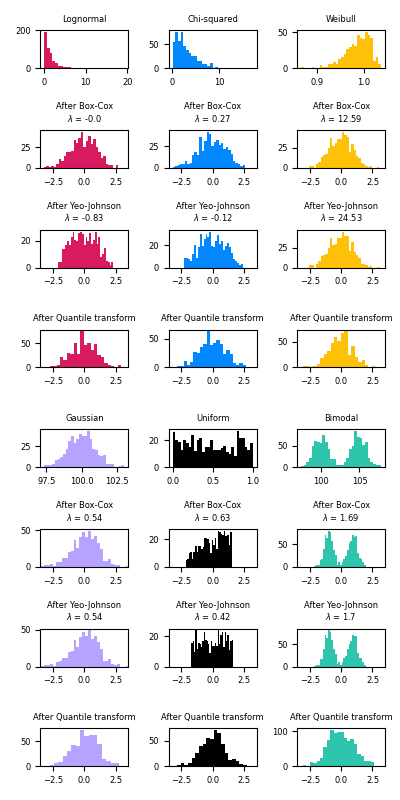

In [157]:
quantile_transformer = preprocessing.QuantileTransformer(
    output_distribution='normal', random_state=0)
X_trans = quantile_transformer.fit_transform(X)
quantile_transformer.quantiles_

d:\a27_YEARS_OLD\ml_tools\venv\Lib\site-packages\sklearn\preprocessing\_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  warnings.warn(


array([[4.3, 2. , 1. , 0.1],
       [4.4, 2.2, 1.1, 0.1],
       [4.4, 2.2, 1.2, 0.1],
       [4.4, 2.2, 1.2, 0.1],
       [4.5, 2.3, 1.3, 0.1],
       [4.6, 2.3, 1.3, 0.2],
       [4.6, 2.3, 1.3, 0.2],
       [4.6, 2.3, 1.3, 0.2],
       [4.6, 2.4, 1.3, 0.2],
       [4.7, 2.4, 1.3, 0.2],
       [4.7, 2.4, 1.3, 0.2],
       [4.8, 2.5, 1.4, 0.2],
       [4.8, 2.5, 1.4, 0.2],
       [4.8, 2.5, 1.4, 0.2],
       [4.8, 2.5, 1.4, 0.2],
       [4.8, 2.5, 1.4, 0.2],
       [4.9, 2.5, 1.4, 0.2],
       [4.9, 2.5, 1.4, 0.2],
       [4.9, 2.5, 1.4, 0.2],
       [4.9, 2.6, 1.4, 0.2],
       [4.9, 2.6, 1.4, 0.2],
       [4.9, 2.6, 1.4, 0.2],
       [5. , 2.6, 1.4, 0.2],
       [5. , 2.6, 1.4, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5.1, 2.7, 1.5, 0.2],
       [5.1, 2.8, 1.5, 0.2],
       [5.1, 2

Normalization

Normalization is the process of scaling individual samples to have unit norm. This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples.

In [158]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
X_normalized = preprocessing.normalize(X, norm='l2')

In [ ]:
X_normalized

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [160]:
normalizer = preprocessing.Normalizer().fit(X)  # fit does nothing
normalizer

Normalizer()

In [161]:
normalizer.transform(X)

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [162]:

normalizer.transform([[-1.,  1., 0.]])

array([[-0.70710678,  0.70710678,  0.        ]])

Encoding categorical features

Often features are not given as continuous values but categorical. For example a person could have features ["male", "female"], ["from Europe", "from US", "from Asia"], ["uses Firefox", "uses Chrome", "uses Safari", "uses Internet Explorer"]. Such features can be efficiently coded as integers, for instance ["male", "from US", "uses Internet Explorer"] could be expressed as [0, 1, 3] while ["female", "from Asia", "uses Chrome"] would be [1, 2, 1].

In [163]:
enc = preprocessing.OrdinalEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)

OrdinalEncoder()

To convert categorical features to such integer codes, we can use the OrdinalEncoder. This estimator transforms each categorical feature to one new feature of integers (0 to n_categories - 1):

In [164]:
enc.transform([['female', 'from US', 'uses Safari']])

array([[0., 1., 1.]])

Such integer representation can, however, not be used directly with all scikit-learn estimators, as these expect continuous input, and would interpret the categories as being ordered, which is often not desired (i.e. the set of browsers was ordered arbitrarily).

In [165]:
enc = preprocessing.OrdinalEncoder()
X = [['male'], ['female'], [np.nan], ['female']]
enc.fit_transform(X)

array([[ 1.],
       [ 0.],
       [nan],
       [ 0.]])

In [ ]:
enc = preprocessing.OrdinalEncoder(encoded_missing_value=-1) # encode missing value with -1
X = [['male'], ['female'], [np.nan], ['female']]
enc.fit_transform(X)

array([[ 1.],
       [ 0.],
       [-1.],
       [ 0.]])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
enc = Pipeline(steps=[
    ("encoder", preprocessing.OrdinalEncoder()),
    ("imputer", SimpleImputer(strategy="constant", fill_value=-1)), # strategy=mean/median/mode
])
enc.fit_transform(X)

array([[ 1.],
       [ 0.],
       [-1.],
       [ 0.]])

In [168]:
enc = preprocessing.OneHotEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)

OneHotEncoder()

In [169]:
enc.transform([['female', 'from US', 'uses Safari'],
               ['male', 'from Europe', 'uses Safari']]).toarray()

array([[1., 0., 0., 1., 0., 1.],
       [0., 1., 1., 0., 0., 1.]])

In [170]:
genders = ['female', 'male']
locations = ['from Africa', 'from Asia', 'from Europe', 'from US']
browsers = ['uses Chrome', 'uses Firefox', 'uses IE', 'uses Safari']
enc = preprocessing.OneHotEncoder(categories=[genders, locations, browsers])
# Note that for there are missing categorical values for the 2nd and 3rd
# feature
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)

OneHotEncoder(categories=[['female', 'male'],
                          ['from Africa', 'from Asia', 'from Europe',
                           'from US'],
                          ['uses Chrome', 'uses Firefox', 'uses IE',
                           'uses Safari']])

In [171]:
enc.transform([['female', 'from Asia', 'uses Chrome']]).toarray()

array([[1., 0., 0., 1., 0., 0., 1., 0., 0., 0.]])

It is also possible to encode each column into n_categories - 1 columns instead of n_categories columns by using the drop parameter. This parameter allows the user to specify a category for each feature to be dropped. This is useful to avoid co-linearity in the input matrix in some classifiers.

In [174]:
X = [['male', 'from US', 'uses Safari'],
     ['female', 'from Europe', 'uses Firefox']]
drop_enc = preprocessing.OneHotEncoder(drop='first').fit(X)
drop_enc.categories_

[array(['female', 'male'], dtype=object),
 array(['from Europe', 'from US'], dtype=object),
 array(['uses Firefox', 'uses Safari'], dtype=object)]

In [175]:
drop_enc.transform(X).toarray()

array([[1., 1., 1.],
       [0., 0., 0.]])

In [179]:
X = [['male', 'US', 'Safari'],
     ['female', 'Europe', 'Firefox'],
     ['female', 'Asia', 'Chrome']]
drop_enc = preprocessing.OneHotEncoder(drop='if_binary').fit(X)
drop_enc.categories_

[array(['female', 'male'], dtype=object),
 array(['Asia', 'Europe', 'US'], dtype=object),
 array(['Chrome', 'Firefox', 'Safari'], dtype=object)]

In [180]:
drop_enc.transform(X).toarray()

array([[1., 0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0., 0.]])

If there is a possibility that the training data might have missing categorical features, it can often be better to specify handle_unknown='infrequent_if_exist' instead of setting the categories manually as above. When handle_unknown='infrequent_if_exist' is specified and unknown categories are encountered during transform, no error will be raised but the resulting one-hot encoded columns for this feature will be all zeros or considered as an infrequent category if enabled.

In [182]:
enc = preprocessing.OneHotEncoder(handle_unknown='infrequent_if_exist')
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)




OneHotEncoder(handle_unknown='infrequent_if_exist')

In [183]:
enc.transform([['female', 'from Asia', 'uses Chrome']]).toarray()

array([[1., 0., 0., 0., 0., 0.]])

In the transformed X, the first column is the encoding of the feature with categories “male”/”female”, while the remaining 6 columns is the encoding of the 2 features with respectively 3 categories each.

When handle_unknown='ignore' and drop is not None, unknown categories will be encoded as all zeros:

In [184]:
drop_enc = preprocessing.OneHotEncoder(drop='first',
                                       handle_unknown='ignore').fit(X)
X_test = [['unknown', 'America', 'IE']]
drop_enc.transform(X_test).toarray()

d:\a27_YEARS_OLD\ml_tools\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([[0., 0., 0.]])

In [185]:
drop_enc = preprocessing.OneHotEncoder(drop='if_binary', sparse_output=False,
                                       handle_unknown='ignore').fit(X)
X_test = [['unknown', 'America', 'IE']]
X_trans = drop_enc.transform(X_test)
X_trans

d:\a27_YEARS_OLD\ml_tools\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([[0., 0., 0.]])

In [186]:
X = np.array([['dog'] * 5 + ['cat'] * 20 + ['rabbit'] * 10 +
              ['snake'] * 3], dtype=object).T
enc = preprocessing.OrdinalEncoder(min_frequency=6).fit(X)
enc.infrequent_categories_

[array(['dog', 'snake'], dtype=object)]

In [188]:
enc.transform(np.array([['dog'], ['cat'], ['rabbit'], ['snake']]))

array([[2.],
       [0.],
       [1.],
       [2.]])

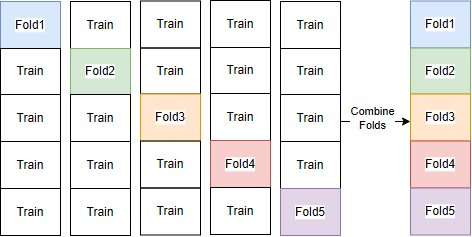

In [193]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit([[1, 2], [np.nan, 3], [7, 6]])

SimpleImputer()

In [194]:
X = [[np.nan, 2], [6, np.nan], [7, 6]]

In [195]:
print(imp.transform(X))

[[4.         2.        ]
 [6.         3.66666667]
 [7.         6.        ]]


In [196]:
import scipy.sparse as sp
X = sp.csc_matrix([[1, 2], [0, -1], [8, 4]])
imp = SimpleImputer(missing_values=-1, strategy='mean')
imp.fit(X)

SimpleImputer(missing_values=-1)

In [197]:
X_test = sp.csc_matrix([[-1, 2], [6, -1], [7, 6]])
print(imp.transform(X_test).toarray())

[[3. 2.]
 [6. 3.]
 [7. 6.]]


In [198]:
import pandas as pd
df = pd.DataFrame([["a", "x"],
                   [np.nan, "y"],
                   ["a", np.nan],
                   ["b", "y"]], dtype="category")

imp = SimpleImputer(strategy="most_frequent")
print(imp.fit_transform(df))

[['a' 'x']
 ['a' 'y']
 ['a' 'y']
 ['b' 'y']]


Univariate: Analyzes a single variable.

Bivariate: Analyzes two variables and their relationship.

Multivariate: Analyzes three or more variables and their interactions.

In [ ]:
import numpy as np
from sklearn.impute import KNNImputer # nearest neighbor
nan = np.nan
X = [[1, 2, nan], [3, 4, 3], [nan, 6, 5], [8, 8, 7]]
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputer.fit_transform(X)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

In [ ]:
X_test_transformed = scaler.transform(X_test)
mean_squared_error(y_test, model.predict(X_test_transformed))

In [ ]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LinearRegression())
model.fit(X_train, y_train)
mean_squared_error(y_test, model.predict(X_test))

Inconsistent preprocessing

scikit-learn provides a library of Dataset transformations, which may clean (see Preprocessing data), reduce (see Unsupervised dimensionality reduction), expand (see Kernel Approximation) or generate (see Feature extraction) feature representations. If these data transforms are used when training a model, they also must be used on subsequent datasets, whether it’s test data or data in a production system. Otherwise, the feature space will change, and the model will not be able to perform effectively.

Data leakage

Data leakage occurs when information that would not be available at prediction time is used when building the model. This results in overly optimistic performance estimates, for example from cross-validation, and thus poorer performance when the model is used on actually novel data, for example during production.

A common cause is not keeping the test and train data subsets separate. Test data should never be used to make choices about the model. The general rule is to never call fit on the test data. While this may sound obvious, this is easy to miss in some cases, for example when applying certain pre-processing steps.

Although both train and test data subsets should receive the same preprocessing transformation (as described in the previous section), it is important that these transformations are only learnt from the training data. For example, if you have a normalization step where you divide by the average value, the average should be the average of the train subset, not the average of all the data. If the test subset is included in the average calculation, information from the test subset is influencing the model.

In [200]:
from sklearn.model_selection import KFold
import numpy as np

X = y = np.arange(10)
rng = np.random.RandomState(0)
cv = KFold(n_splits=2, shuffle=True, random_state=rng)

for train, test in cv.split(X, y):
    print(train, test)

for train, test in cv.split(X, y):
    print(train, test)

[0 3 5 6 7] [1 2 4 8 9]
[1 2 4 8 9] [0 3 5 6 7]
[0 4 6 7 8] [1 2 3 5 9]
[1 2 3 5 9] [0 4 6 7 8]


In [201]:
X

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])